#### **Police Arrests**

That sounds like no fun. Not only is it no fun being arrested, it is also no fun if arrests happen frequently around you, which would usually indicate a high crime rate or at least less safety compared to a nieghborhood with fewer arrests. Those then likely mean the neighborhood isn't the most well put-together. All of these significantly increase the likelihood that said beighborhood is one that would be depressing to live in. Thus, we conclude that the number of arrests in a given neighborhood positively correlates with how depressing it is. `More arrests = more depressing`. The data we are using covers only the last eight years (from 2016 onwards), so we needn't worry about outdated or irrelevant data due to age.

Let us read the file.

In [11]:
arrests = pd.read_csv("arrests.csv")
arrests.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


That's a lot of depressing data. Let us filter out what we don't need.

In [12]:
    arrests[["OFFENSES", "ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].head(5)

,OFFENSES,ARRESTTIME,INCIDENTNEIGHBORHOOD
0,3929 Retail Theft.,2016-08-24T12:20:00,Bloomfield
1,13(a)(16) Possession of Controlled Substance,2016-08-03T14:55:00,Outside City
2,3929 Retail Theft.,2016-08-03T16:45:00,Westwood
3,5503 Disorderly Conduct. / 5505 Public Drunken...,2016-08-05T02:36:00,East Allegheny
4,2702 Aggravated Assault. / 2705 Recklessy Enda...,2016-08-06T02:00:00,Crafton Heights


Now, we sort by `neighborhood` to count the number of arrets that occured in each. One easy way is to just count unique `ARRESTTIME` timestamps, since they appear to be accurate down to the minute, and it is extremely unlikely that two instances of arrest in the same neighborhood occur at exactly the same minute within the scope of this dataset.

In [18]:
arrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].groupby("INCIDENTNEIGHBORHOOD").count()

,ARRESTTIME
INCIDENTNEIGHBORHOOD,
Allegheny Center,1244
Allegheny West,130
Allentown,947
Arlington,312
Arlington Heights,155
...,...
Upper Lawrenceville,189
West End,290
West Oakland,325


In [17]:
# weight by year

In [32]:
arrestsSeries = arrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].groupby("INCIDENTNEIGHBORHOOD").count().loc[:, "ARRESTTIME"].sort_values(ascending=True)
arrestsSeries

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      37
                             ... 
Homewood South               2090
East Allegheny               2217
Carrick                      2352
South Side Flats             3497
Central Business District    4440
Name: ARRESTTIME, Length: 98, dtype: int64

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

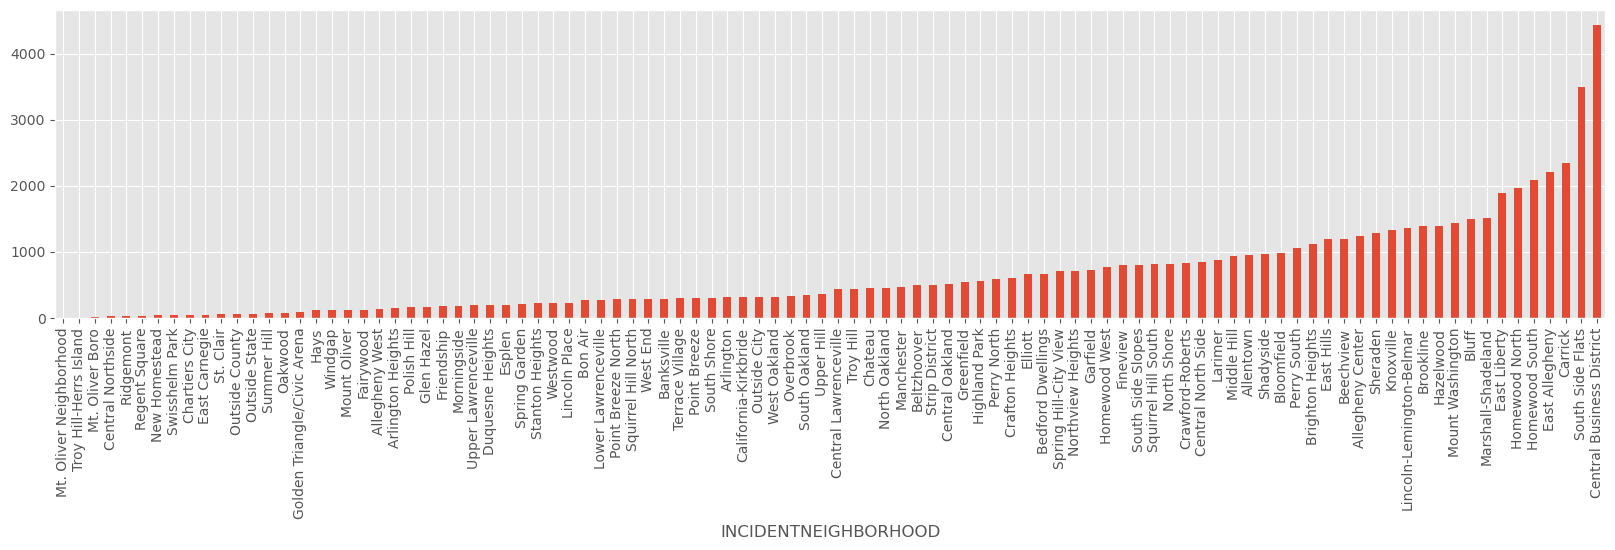

In [33]:
plt.style.use("ggplot")
arrestsSeries.plot.bar(figsize=(20,4))

Now we can clearly see that Downtown appears to be the worst neighborhood to live in by this metric. Not surprising, considering that downtowns are typically the most active parts of a city and that more crime typically is an inevitable part of that.
<br>
Plenty of neighborhoods seem to have very little arrests within the last eight years, and the one with the absolute least is none other than `Mt. Oliver`! Yeah, no, I have no idea where that is too. A quick glance at Google images tells me that it is your average Pittsburgh residential, mildly suburban chill neighborhood. I've got nothing else to go off of, so this is all I am really able to say. Congrats, Mt. Oliver, I guess.